In [1]:
%config ZMQInteractiveShell.ast_node_interactivity = "all"
%pprint

Pretty printing has been turned OFF


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [108]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["font.size"] = 12
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.facecolor"] = "WhiteSmoke"

## 载入训练集

### 标签分布

In [56]:
# 只载入标签
train_label_data = pd.read_csv("../data/train_set.csv", usecols=[0], sep="\t")
# shape
train_label_data.shape

(200000, 1)

有20w条训练数据

In [57]:
# 标记的对应关系
label_to_id = {'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
id_to_label = {label_to_id[label]:label for label in label_to_id}
print(id_to_label)

{0: '科技', 1: '股票', 2: '体育', 3: '娱乐', 4: '时政', 5: '社会', 6: '教育', 7: '财经', 8: '家居', 9: '游戏', 10: '房产', 11: '时尚', 12: '彩票', 13: '星座'}


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

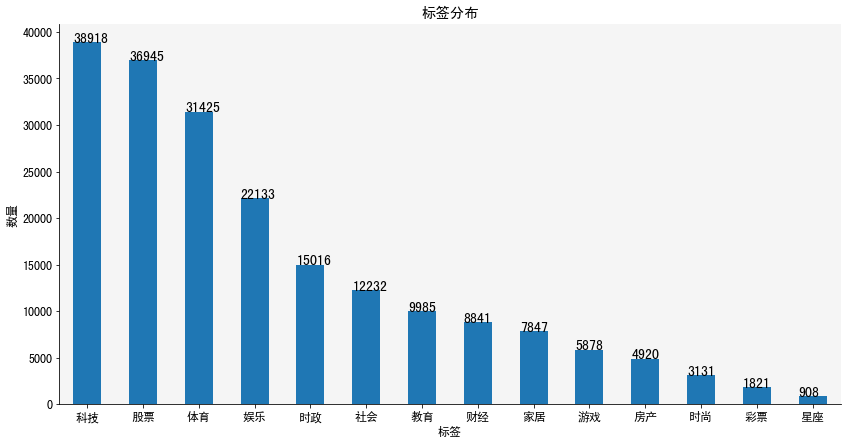

In [58]:
# 画图
plt.figure()
train_label_data["label"].value_counts().plot.bar(rot=0)
_ = plt.title("标签分布")
_ = plt.xlabel("标签")
_ = plt.ylabel("数量")
_ = plt.xticks(np.arange(14), list(id_to_label.values()))

for i in range(len(id_to_label)):
    _ = plt.text(i-0.25, train_label_data["label"].value_counts()[i], 
                 train_label_data["label"].value_counts()[i], fontdict={"size":14})

<AxesSubplot:>

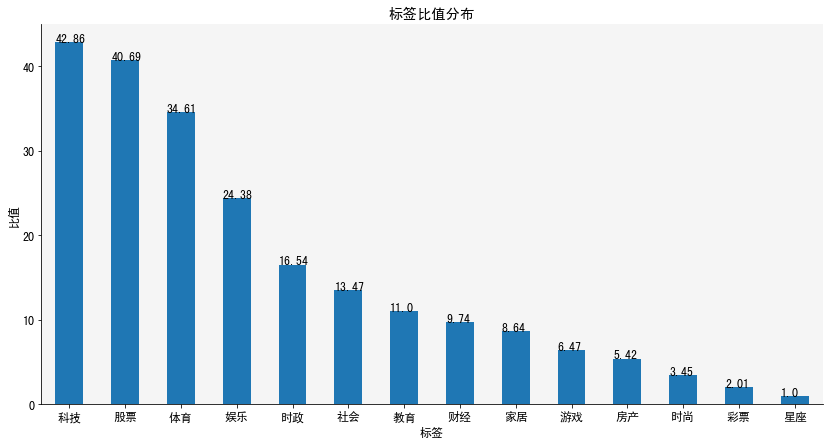

In [67]:
# 各新闻的比值
train_label_data_odd_value = train_label_data["label"].value_counts() / train_label_data["label"].value_counts().iloc[-1]
train_label_data_odd_value.plot.bar(rot=0)
_ = plt.title("标签比值分布")
_ = plt.xlabel("标签")
_ = plt.ylabel("比值")
_ = plt.xticks(np.arange(14), list(id_to_label.values()))

for i in range(len(id_to_label)):
    _ = plt.text(i-0.25, train_label_data_odd_value[i], 
                 round(train_label_data_odd_value[i], 2), fontdict={"size":12})

1. 可以看出科技、股票、体育等新闻占比较大，而时尚、彩票、星座等占比较少
2. 训练集存在类别不均衡的情况
    - 最高相差40+倍

### token分布

In [36]:
# train_text_data = pd.read_csv("../data/train_set.csv", usecols=[1], sep="\t")
train_text_data = pd.read_csv("../data/train_set.csv", usecols=[1], sep="\t", nrows=1000)
# shape
train_text_data.shape

(1000, 1)

In [37]:
# 查看头几行
train_text_data.head()
# 缺失值
train_text_data.isnull().sum()

,text
0,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


text    0
dtype: int64

#### 查看训练集token的分布

In [38]:
# 将每一行内容转化成列表
train_text_data_list = train_text_data.text.tolist()

# 分词
train_text_data_list = list(map(lambda x: x.split(" "), train_text_data_list))
train_text_data_seglist = sum(tqdm(train_text_data_list), [])
len(train_text_data_seglist)

100%|██████████| 1000/1000 [00:09<00:00, 105.99it/s]


904309

In [39]:
# 统计数量
train_text_data_counter = Counter(train_text_data_seglist)
len(train_text_data_counter)

3969

<BarContainer object of 30 artists>

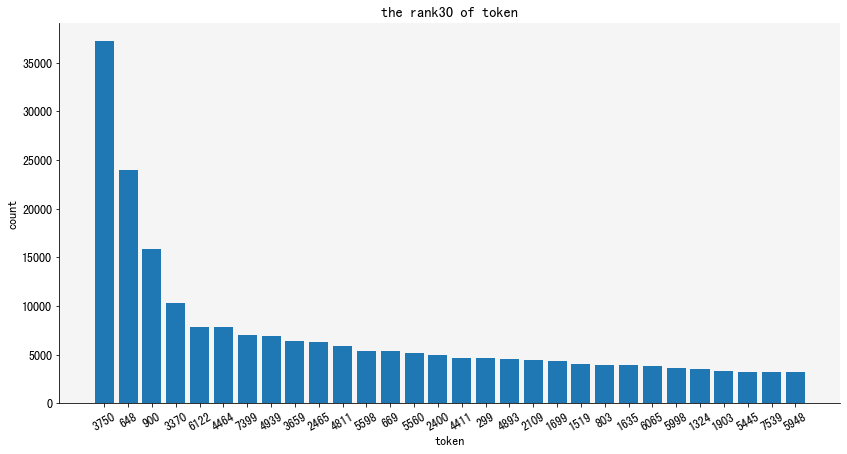

In [40]:
# 绘制数量rank前30的token
token_rank30_zip = train_text_data_counter.most_common(30)
token_rank30, token_rank30_count = list(zip(*token_rank30_zip))
plt.bar(range(len(token_rank30)), token_rank30_count)
_ = plt.xlabel("token")
_ = plt.ylabel("count")
_ = plt.title("the rank30 of token")
_ = plt.xticks(np.arange(len(token_rank30)), token_rank30, rotation=30)

# # 添加标签
# for pos in range(len(token_rank30)):
#     _ = plt.text(pos-0.25, token_rank30_count[pos], token_rank30_count[pos], fontdict={"size":10})

#### 数据集的长度分布

In [41]:
# 统计训练数据的分布
train_text_length = list(map(lambda x: len(x), train_text_data_list))
train_len_bin = pd.Series(pd.cut(train_text_length, 
                                 bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, np.inf]))
train_len_dist = train_len_bin.value_counts()

<AxesSubplot:>

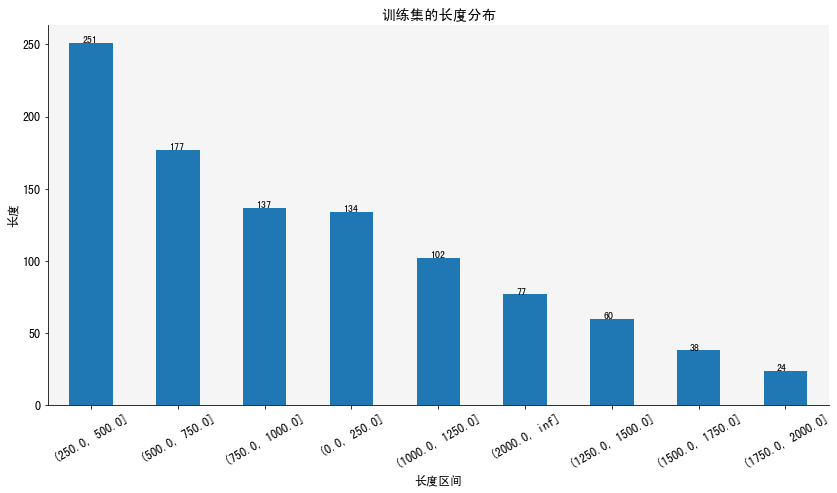

In [42]:
# 画图
train_len_dist.plot.bar(rot=30)
_ = plt.title("训练集的长度分布")
_ = plt.xlabel("长度区间")
_ = plt.ylabel("长度")

# 标签
for i in range(len(train_len_dist)):
    _ = plt.text(i-0.1, train_len_dist.iloc[i], train_len_dist.iloc[i], fontdict={"size":10})

<AxesSubplot:ylabel='Count'>

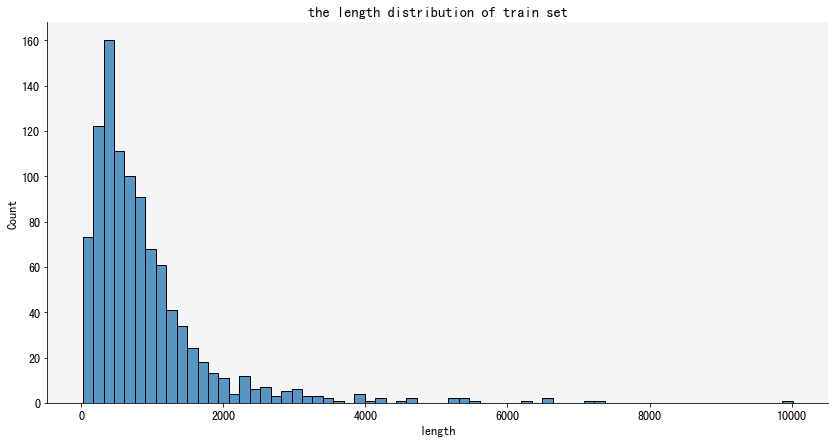

In [43]:
# 画直方图
sns.histplot(train_text_length)
# sns.distplot(train_text_length)
_ = plt.title("the length distribution of train set")
_ = plt.xlabel("length")
# _ = plt.xlim(0, max(train_text_length))

可以看出大部分的文本长度都在0-1000，只有极少文本长度大于2000

### 联合分布

In [44]:
train_data = pd.read_csv("../data/train_set.csv", sep="\t", nrows=1000)
# shape
train_data.shape
# 前几行
train_data.head()

(1000, 2)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


#### 各标签的token分布

100%|██████████| 181/181 [00:00<00:00, 712.02it/s] 

科技


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

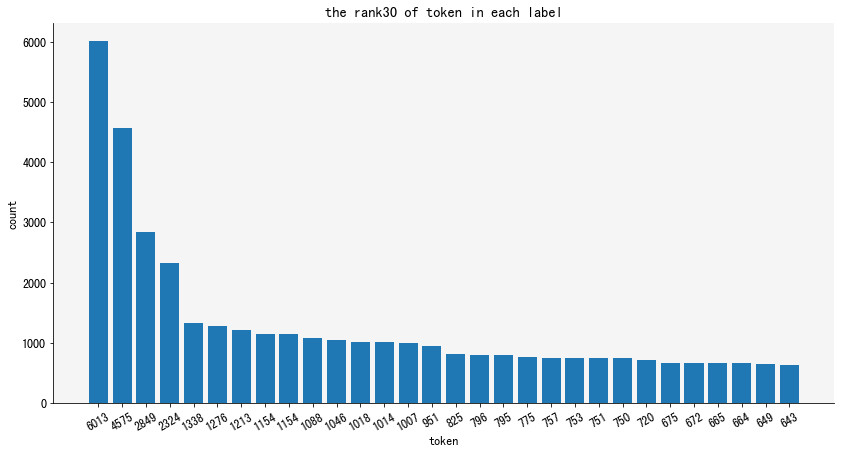

100%|██████████| 206/206 [00:00<00:00, 690.03it/s] 

股票


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

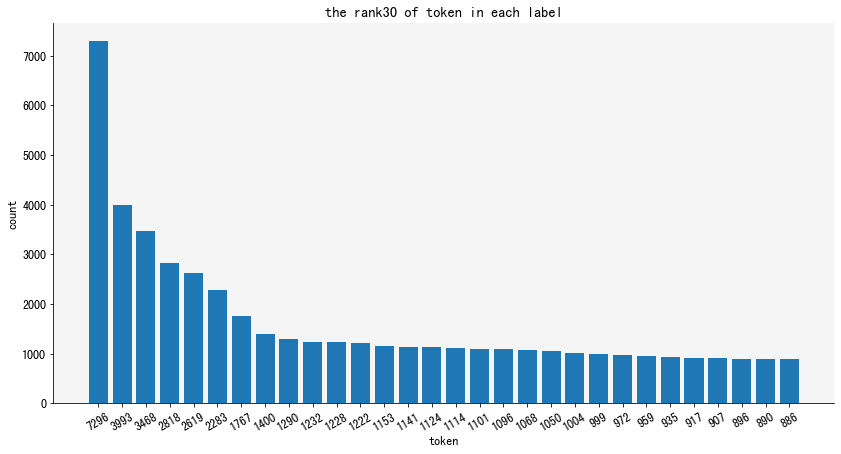

100%|██████████| 152/152 [00:00<00:00, 860.35it/s] 

体育


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

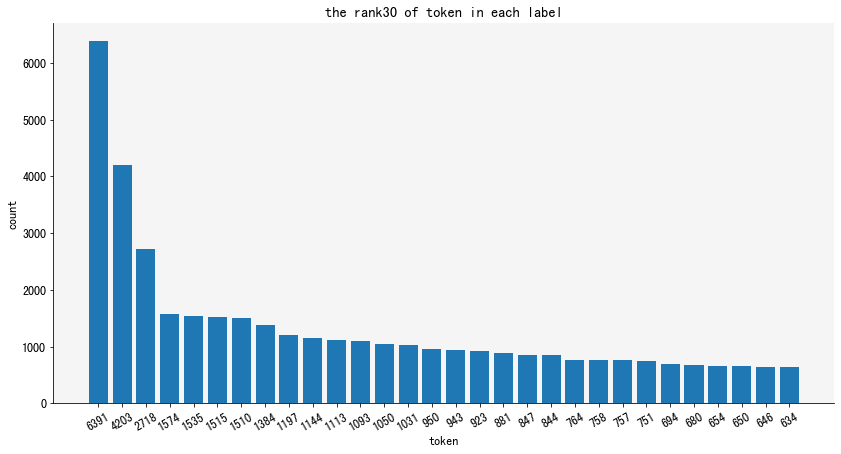

100%|██████████| 113/113 [00:00<00:00, 1743.04it/s]

娱乐


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

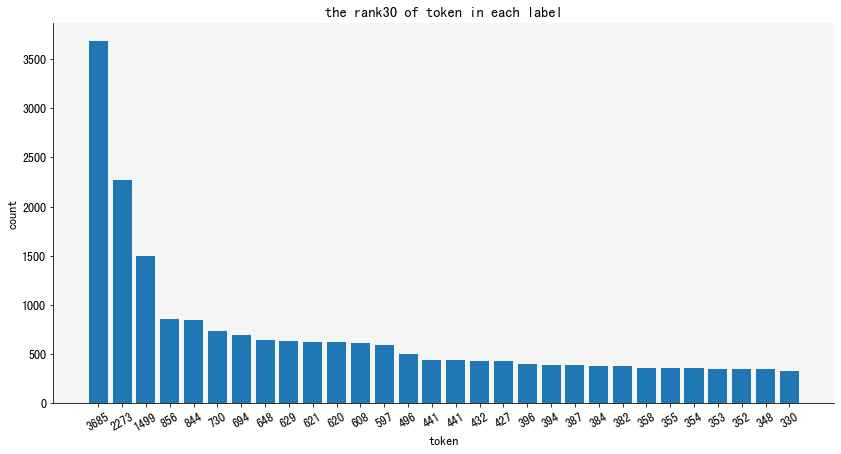

100%|██████████| 81/81 [00:00<00:00, 4472.25it/s]

时政


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

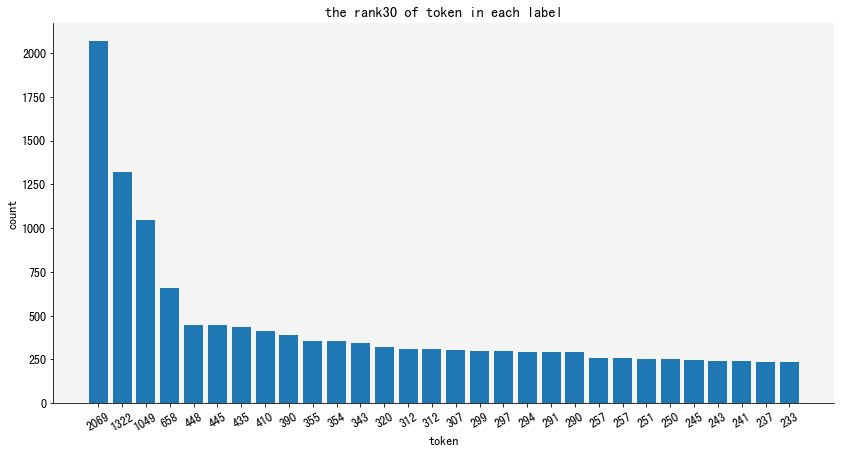

100%|██████████| 61/61 [00:00<00:00, 2710.93it/s]

社会


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

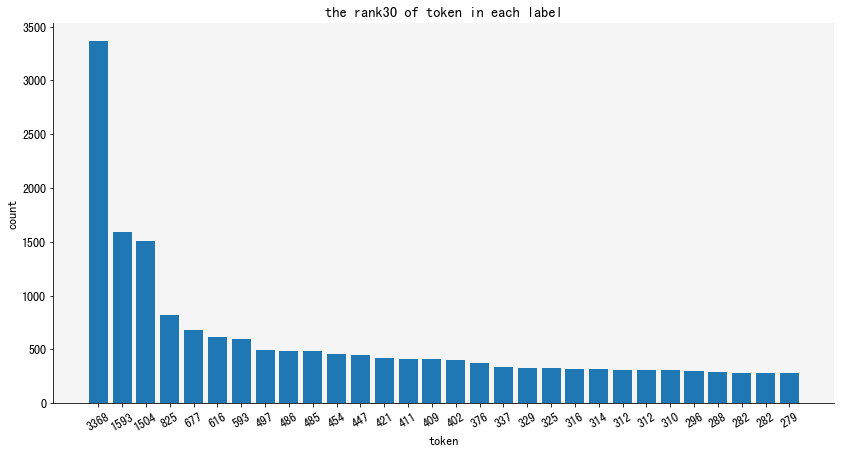

100%|██████████| 43/43 [00:00<00:00, 4958.35it/s]

教育


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

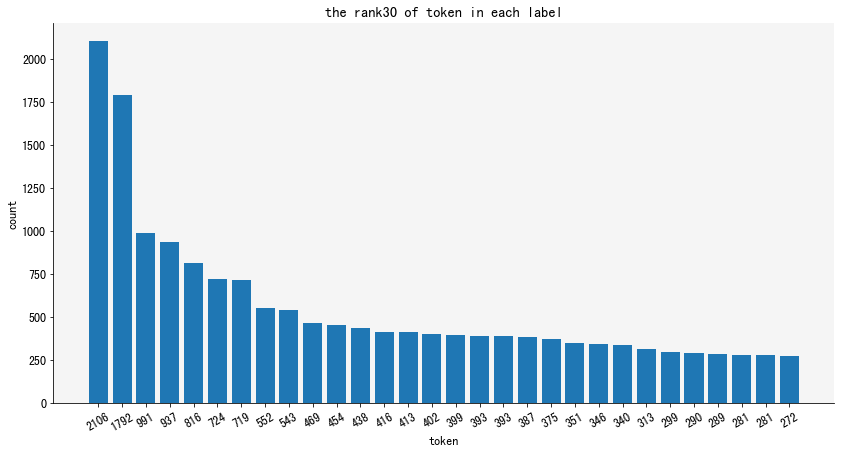

100%|██████████| 43/43 [00:00<00:00, 3357.94it/s]

财经


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

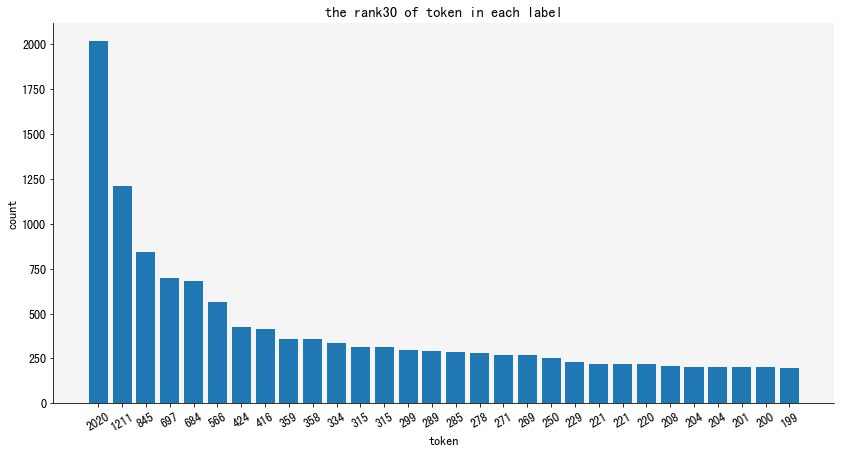

100%|██████████| 44/44 [00:00<00:00, 10158.49it/s]

家居


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

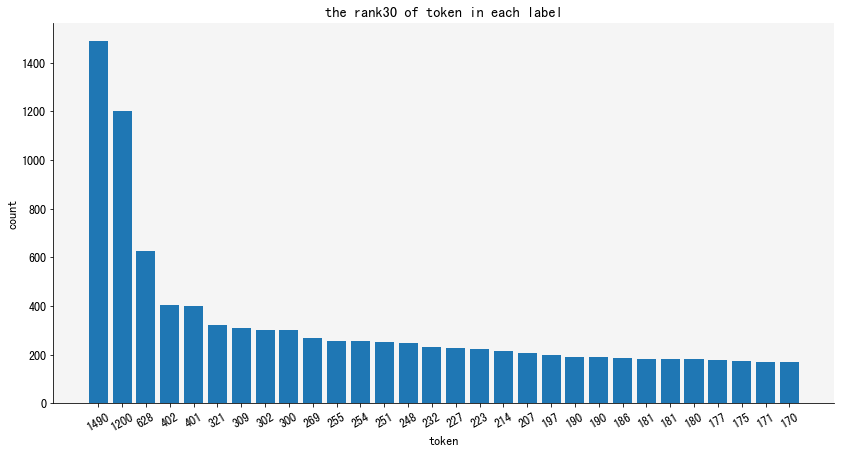

100%|██████████| 23/23 [00:00<00:00, 11642.41it/s]

游戏


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

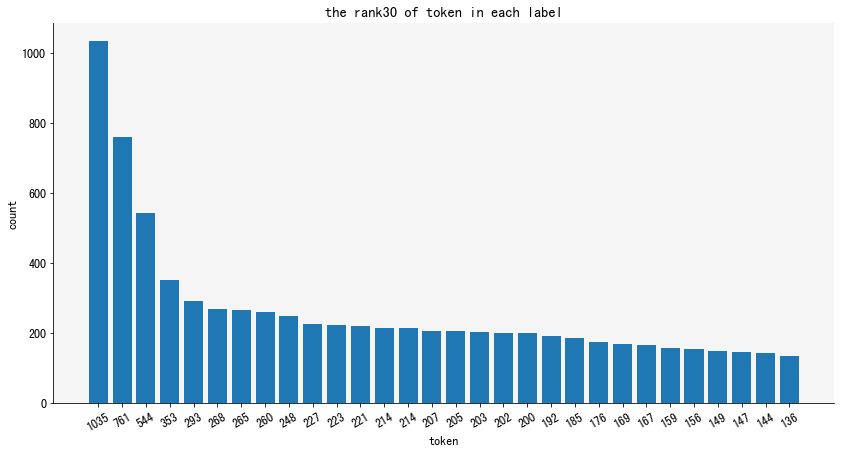

100%|██████████| 27/27 [00:00<00:00, 13417.80it/s]

房产


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

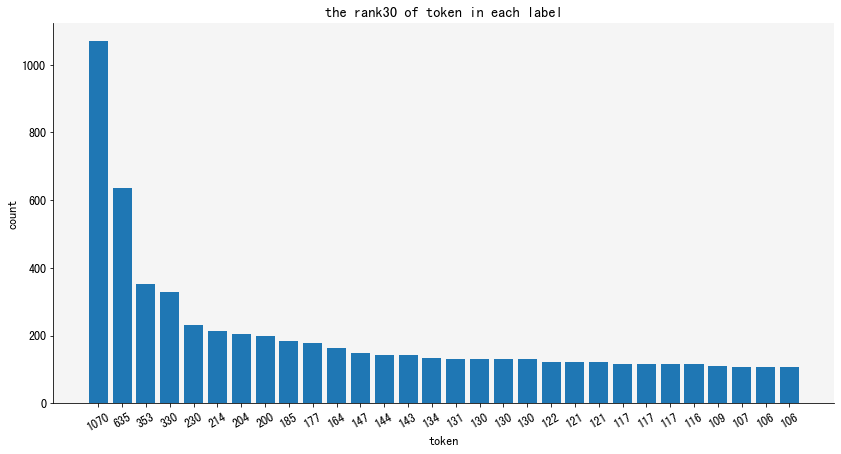

100%|██████████| 14/14 [00:00<00:00, 25332.29it/s]

时尚


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

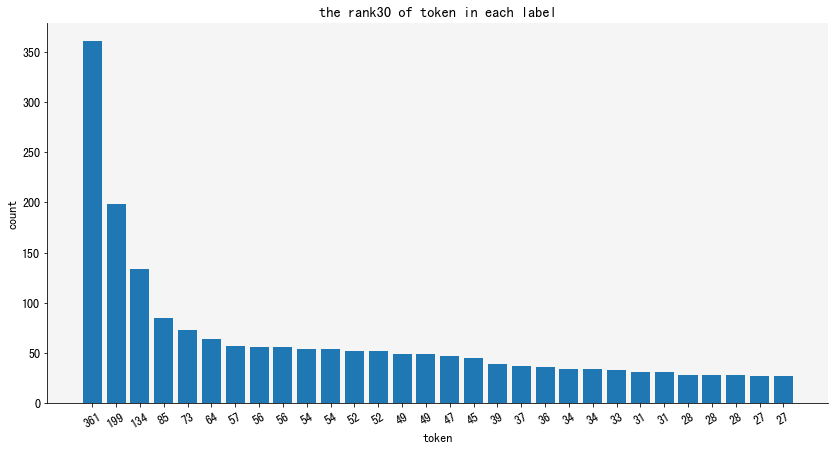

100%|██████████| 6/6 [00:00<00:00, 19433.07it/s]

彩票


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

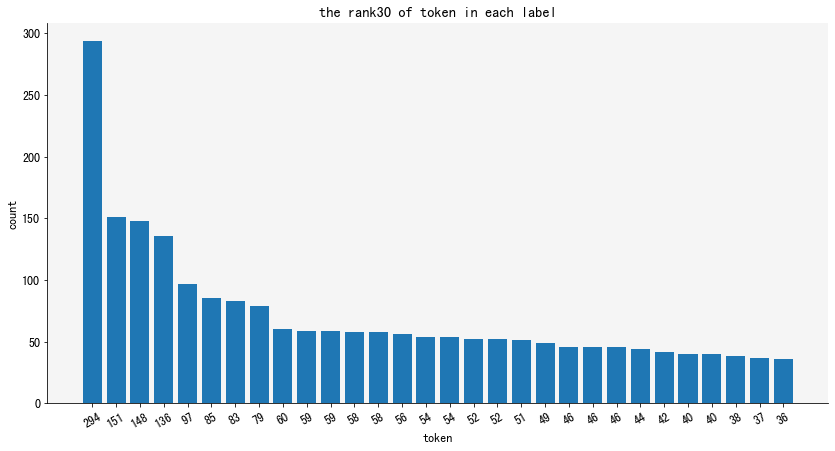

100%|██████████| 6/6 [00:00<00:00, 14597.35it/s]

星座


<Figure size 1008x504 with 0 Axes>

<BarContainer object of 30 artists>

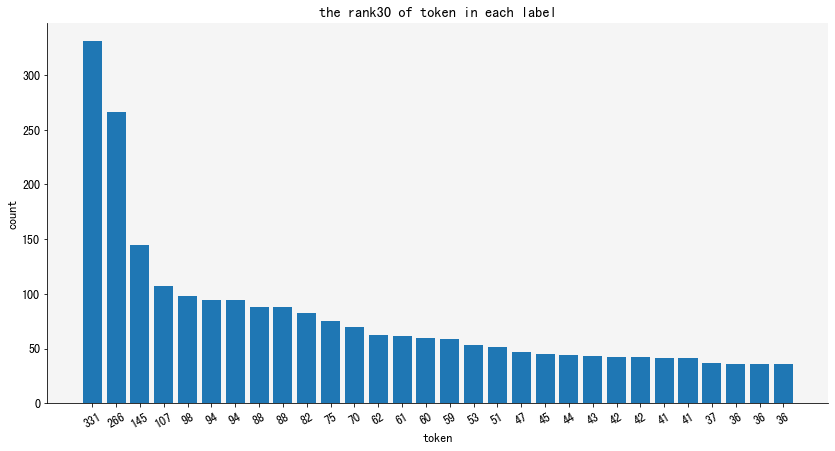

In [45]:
for idx, lab in enumerate(id_to_label):
    train_text_each_label = train_data.loc[train_data.label==lab, "text"].tolist()
    train_text_each_label_seg = list(map(lambda x: x.split(" "), train_text_each_label))
    train_text_each_label_seg = sum(tqdm(train_text_each_label_seg), [])
    train_text_each_label_counter = Counter(train_text_each_label_seg)
    train_text_each_label_rank30 = train_text_each_label_counter.most_common(30)
    train_text_each_label_rank = train_text_each_label_counter.most_common()
    
    # 画图
    print(id_to_label[lab])
    each_label_rank30, each_label_rank30_count = zip(*train_text_each_label_rank30)
    each_label_rank, each_label_rank_count = zip(*train_text_each_label_rank)
    plt.figure()
    plt.bar(range(len(each_label_rank30)), each_label_rank30_count)
    _ = plt.xlabel("token")
    _ = plt.ylabel("count")
    _ = plt.title("the rank30 of token in each label")
    _ = plt.xticks(np.arange(len(each_label_rank30)), each_label_rank30_count, rotation=30)
    plt.show()
    
    if idx == 0:
        common30_token_set = set(each_label_rank30)
        common_token_set = set(each_label_rank)
    else:
        common30_token_set = common30_token_set.intersection(set(each_label_rank30))
        common_token_set = common_token_set.intersection(set(each_label_rank))

In [48]:
# 各个标签都有的token(前30)
common30_token_set
# 和所有token前30交集
set(token_rank30).intersection(common30_token_set)
# 各个标签都有的token
len(common_token_set)

{'3750', '7399', '900', '648'}

{'3750', '7399', '900', '648'}

353

'3750', '7399', '900', '648'可能是标点符号

#### 各标签的长度分布

科技


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

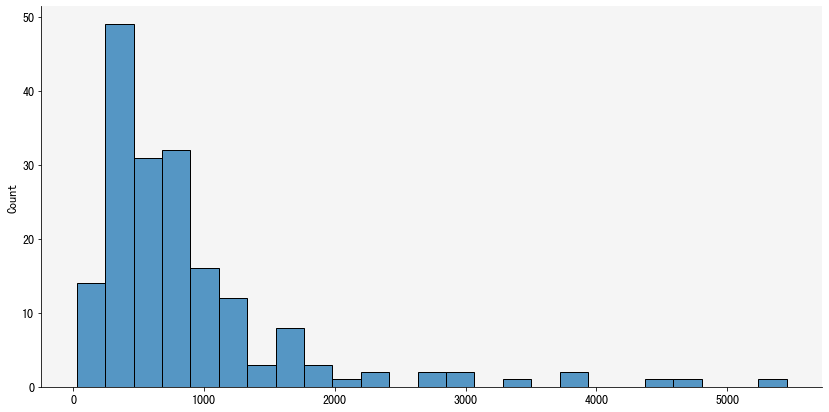

股票


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

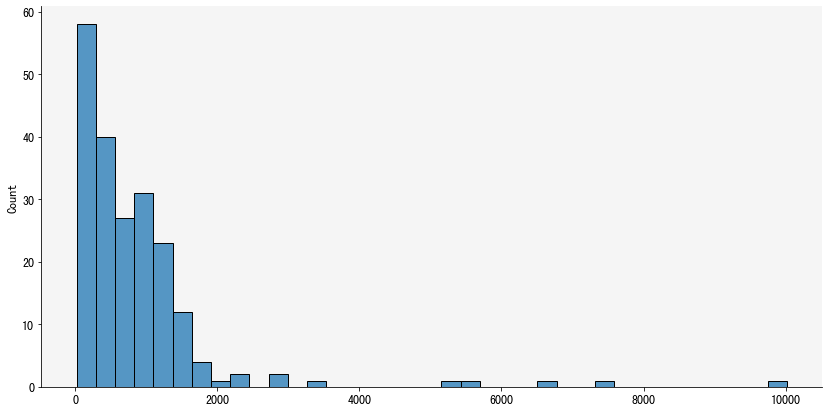

体育


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

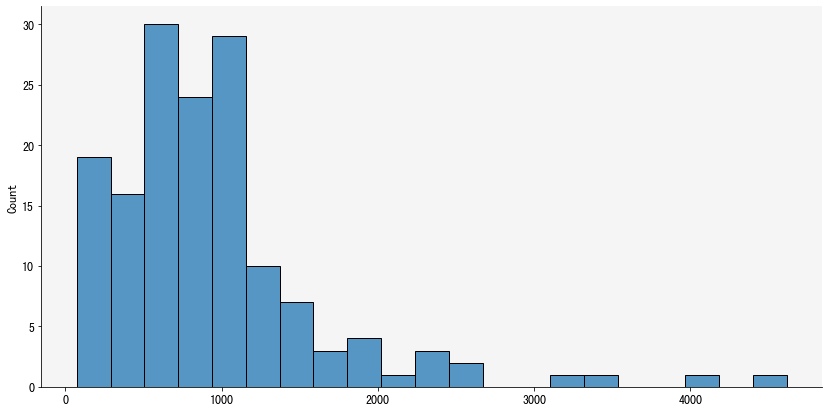

娱乐


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

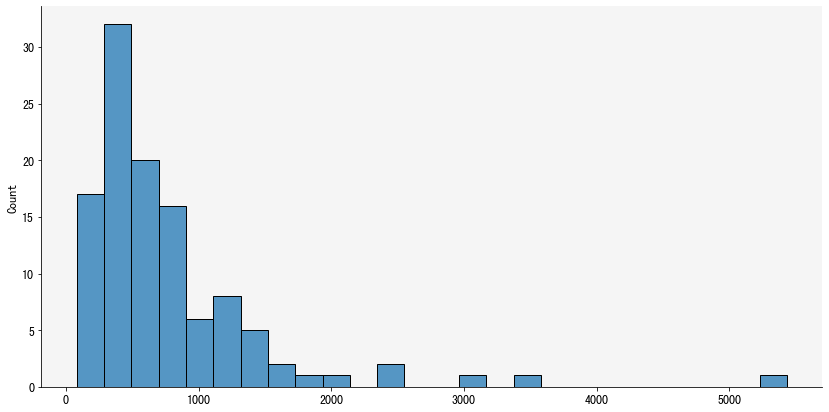

时政


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

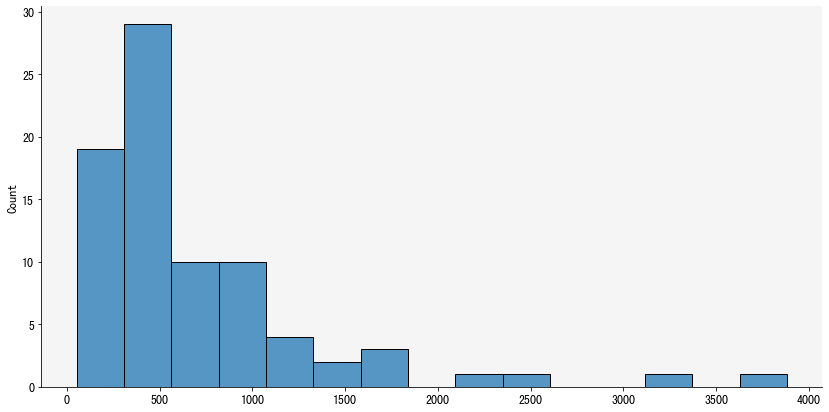

社会


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

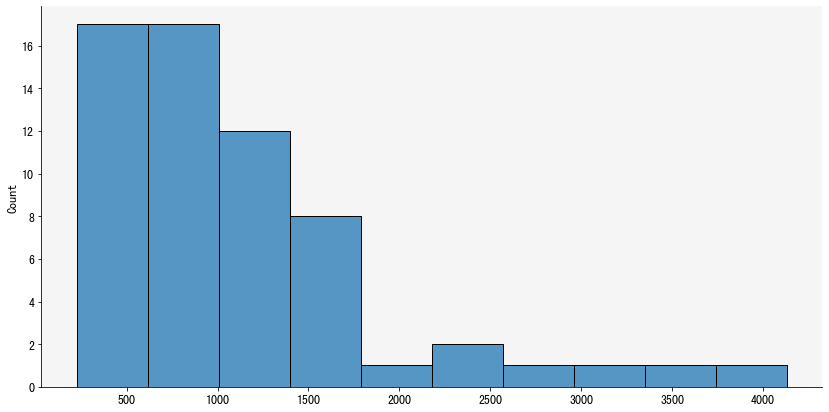

教育


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

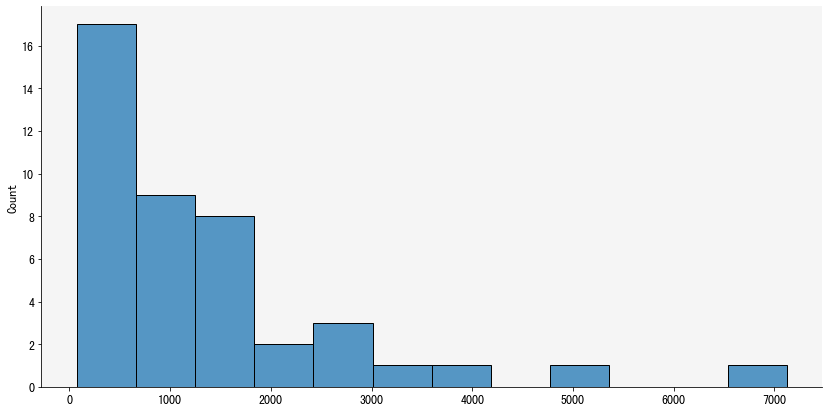

财经


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

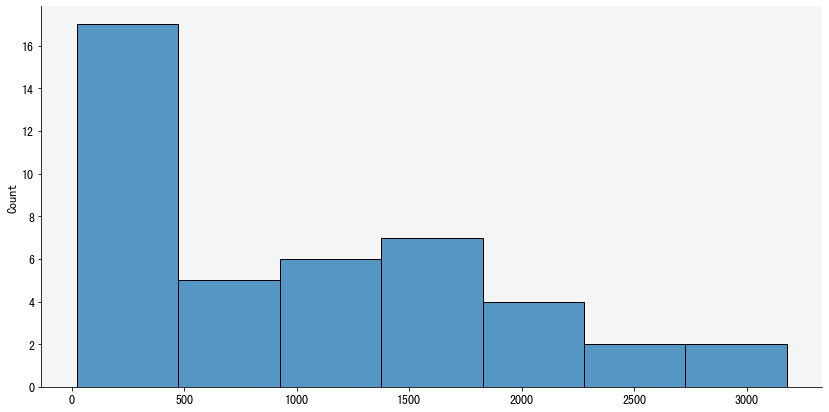

家居


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

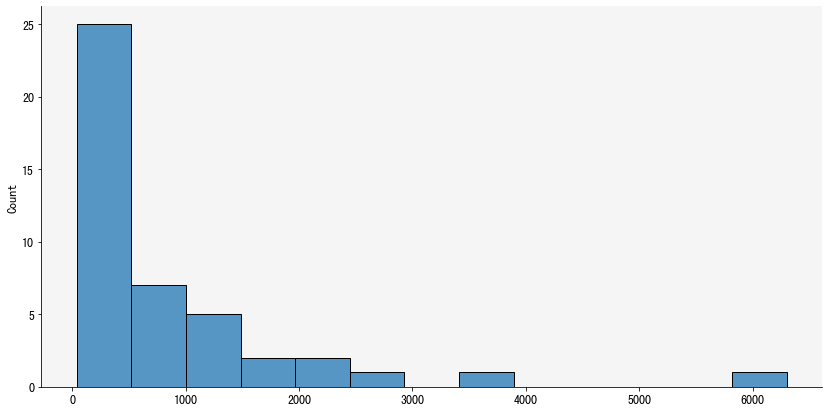

游戏


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

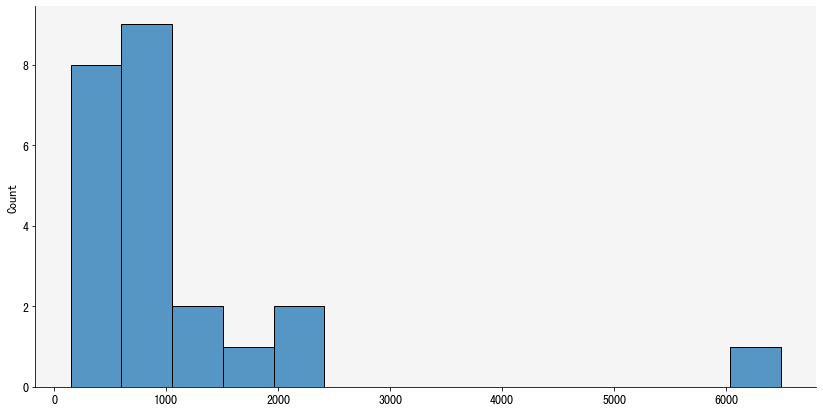

房产


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

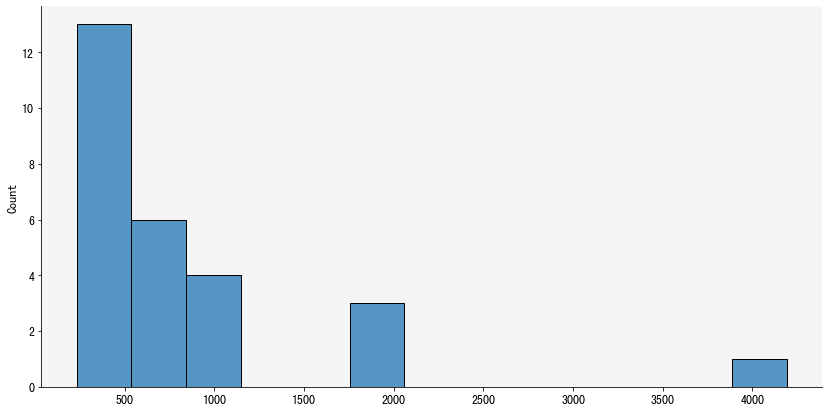

时尚


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

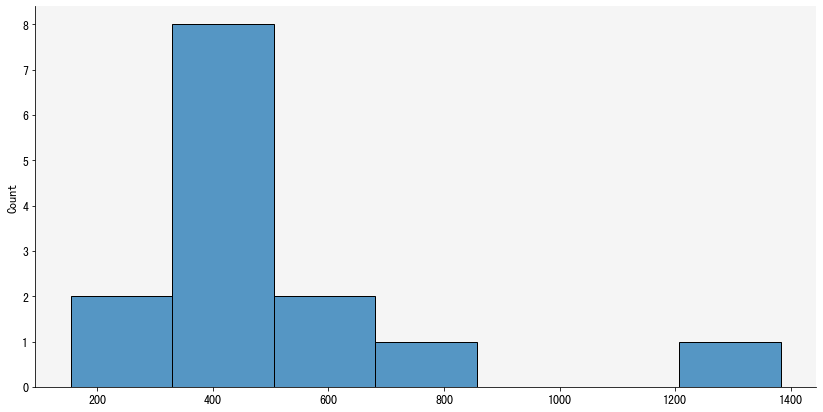

彩票


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

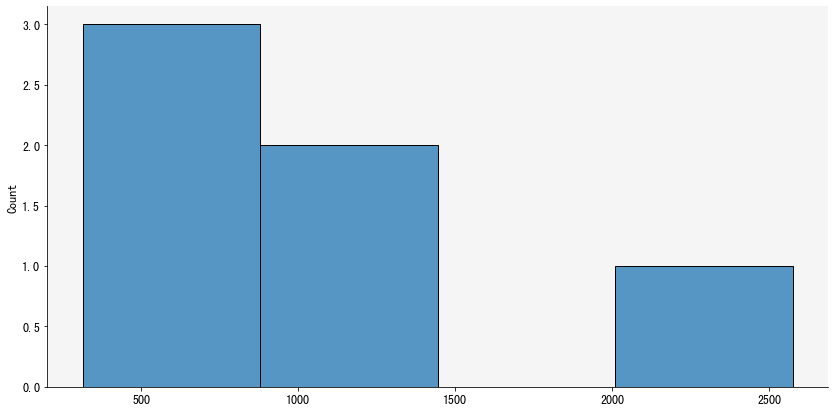

星座


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:ylabel='Count'>

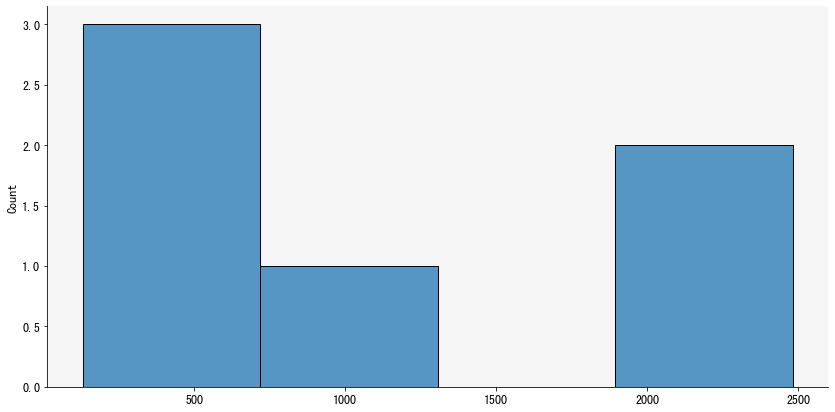

In [54]:
for lab in id_to_label:
    train_text_each_label = train_data.loc[train_data.label==lab, "text"].tolist()
    train_text_each_label_list = list(map(lambda x: x.split(" "), train_text_each_label))
    train_text_each_label_length = list(map(lambda x: len(x), train_text_each_label_list))
    
    print(id_to_label[lab])
    plt.figure()
    sns.histplot(train_text_each_label_length)
    plt.show()

股票文本的长度较短，体育文本长度较长

,label,text,length
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307


/home/jianli/software/anacond3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


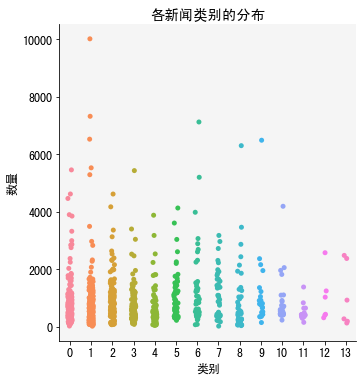

In [94]:
# 把各类别画在一个图
train_data["length"] = train_data.text.apply(lambda x: len(x.split(" ")))
train_data.head()

sns.catplot("label", "length", data=train_data)
_ = plt.title("各新闻类别的分布")
_ = plt.xlabel("类别")
_ = plt.ylabel("数量")

各新闻类别的分布不一定相同，而“1”新闻的字符长度的极值最大，在各类新闻中有着最大的新闻长度（股票新闻又臭又长），时尚/星座等新闻通常比较简短

In [114]:
# 保存指标
with open("../data/train_label_len_desc.txt", "w+") as f:
    _ = f.write("idx,label,count,mean,std,min,25%,50%,75%,max")
    _ = f.write("\n")
    
    for label, idx in label_to_id.items():
        # 分别提取各类别的字符长度
        temp = train_data[train_data.label == idx]
        temp_len_describe = temp.text.apply(lambda x: len(x.split(" "))).describe()
    
        # 各类别汇总
        _ = f.write(f"{idx},{label},")
        _ = f.write(",".join(map(lambda x: str(round(x, 3)), \
                                 list(temp_len_describe.values))))
        _ = f.write("\n")

In [115]:
%cat ../data/train_label_len_desc.txt

idx,label,count,mean,std,min,25%,50%,75%,max
0,科技,181.0,881.796,840.196,26.0,401.0,650.0,1031.0,5458.0
1,股票,206.0,874.927,1143.219,21.0,264.25,620.0,1082.5,10018.0
2,体育,152.0,942.829,714.401,72.0,529.5,809.0,1114.5,4618.0
3,娱乐,113.0,762.646,727.539,82.0,350.0,585.0,864.0,5433.0
4,时政,81.0,693.765,671.271,53.0,311.0,496.0,879.0,3881.0
5,社会,61.0,1102.066,786.468,225.0,564.0,879.0,1382.0,4132.0
6,教育,43.0,1353.651,1413.061,72.0,426.5,891.0,1518.0,7125.0
7,财经,43.0,1074.605,817.359,23.0,392.5,877.0,1618.0,3178.0
8,家居,44.0,861.568,1162.123,40.0,184.0,471.0,1038.5,6301.0
9,游戏,23.0,1138.478,1304.791,147.0,489.5,795.0,1137.5,6490.0
10,房产,27.0,868.667,822.3,232.0,434.0,544.0,895.0,4192.0
11,时尚,14.0,514.786,301.113,154.0,362.75,415.0,606.0,1383.0
12,彩票,6.0,1000.833,859.43,314.0,410.75,732.5,1193.0,2576.0
13,星座,6.0,1064.0,1096.09,131.0,212.75,601.0,2013.75,2483.0


### 比较分布

比较训练集和测试集的分布

In [78]:
import scipy

In [86]:
# 测试集
test_test_data = pd.read_csv("../data/test_a.csv", sep="\t", usecols=[0])
test_test_data.shape

# 测试集的文本长度
test_text_length = test_text_data.text.apply(lambda x: len(x.split(" ")))

(50000, 1)

In [88]:
# 训练集的分布
pd.Series(train_text_length).describe()

# 测试集的分布
test_text_length.describe()

count     1000.00000
mean       904.30900
std        929.32823
min         21.00000
25%        367.00000
50%        656.00000
75%       1102.50000
max      10018.00000
dtype: float64

count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
Name: text, dtype: float64

1. 训练集的最长字符长度为57921，最短的字符长度为2，有75%的句子字符长度在1131以下。
2. 测试集的最长字符长度为41861，最短的字符长度为14，有75%的句子字符长度在1133以下。

In [85]:
# 测试集和训练集的分布比较
scipy.stats.ks_2samp(train_text_length, test_text_length)

KstestResult(statistic=0.028320000000000012, pvalue=0.40410045033234665)

ks检验的原假设为"训练集和测试集在字符长度上有相同的分布"，检验中p值为0.528<0.05，即不能接受原假设，我们可以认为两者有着相同的分布